# Feature Scaling

In [1]:
import pandas as pd
from urllib.request import urlretrieve

url = "https://ac-101708228-virtuoso-prod.s3.amazonaws.com/uploads/download/74/housing.csv"

urlretrieve(url, "housing.csv")

housing = pd.read_csv("housing.csv")
housing.head()

,PRICE,BEDROOMS,FLOOR_AREA,BUILD_YEAR
0,565000,4,160,2003
1,365000,3,139,2013
2,287000,3,86,1979
3,255000,2,59,1953
4,325000,4,131,1998


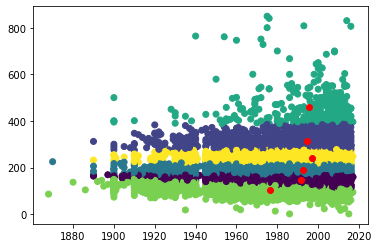

In [2]:
from sklearn.cluster import KMeans

K=6

kmeans = KMeans(n_clusters=K)
cluster = kmeans.fit_predict(housing[["BUILD_YEAR","FLOOR_AREA"]])

import matplotlib.pyplot as plt

plt.scatter(housing["BUILD_YEAR"],housing["FLOOR_AREA"],c=cluster)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red')

(1860.55, 2024.45, -41.400000000000006, 891.4)

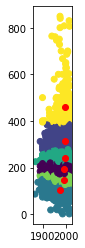

In [3]:
from sklearn.cluster import KMeans

K=6

kmeans = KMeans(n_clusters=K)
cluster = kmeans.fit_predict(housing[["BUILD_YEAR","FLOOR_AREA"]])

import matplotlib.pyplot as plt

plt.scatter(housing["BUILD_YEAR"],housing["FLOOR_AREA"],c=cluster)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red')
plt.axis('scaled')

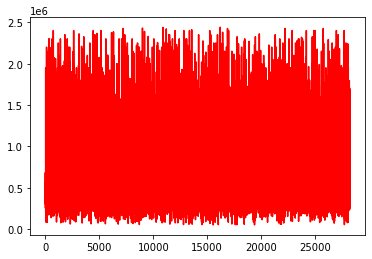

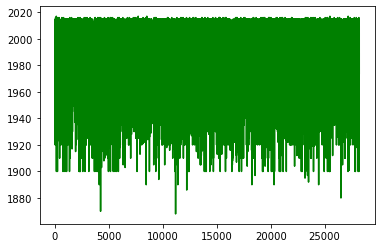

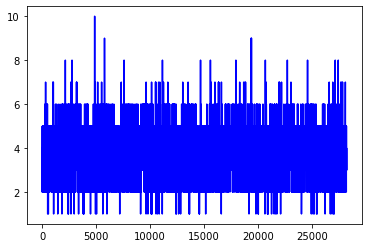

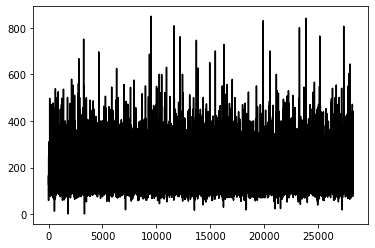

In [4]:
import matplotlib.pyplot as plt
x = range(len(housing))

plt.plot(x,housing["PRICE"],'red')
plt.show()
plt.plot(x,housing["BUILD_YEAR"],'green')
plt.show()
plt.plot(x,housing["BEDROOMS"],'blue')
plt.show()
plt.plot(x,housing["FLOOR_AREA"],'black')
plt.show();

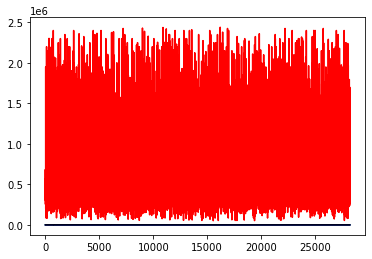

In [5]:
x = range(len(housing))

plt.plot(x,housing["PRICE"],'red')
plt.plot(x,housing["BUILD_YEAR"],'green')
plt.plot(x,housing["BEDROOMS"],'blue')
plt.plot(x,housing["FLOOR_AREA"],'black');

# Feature Scaling with Absolute Maximum Scaling

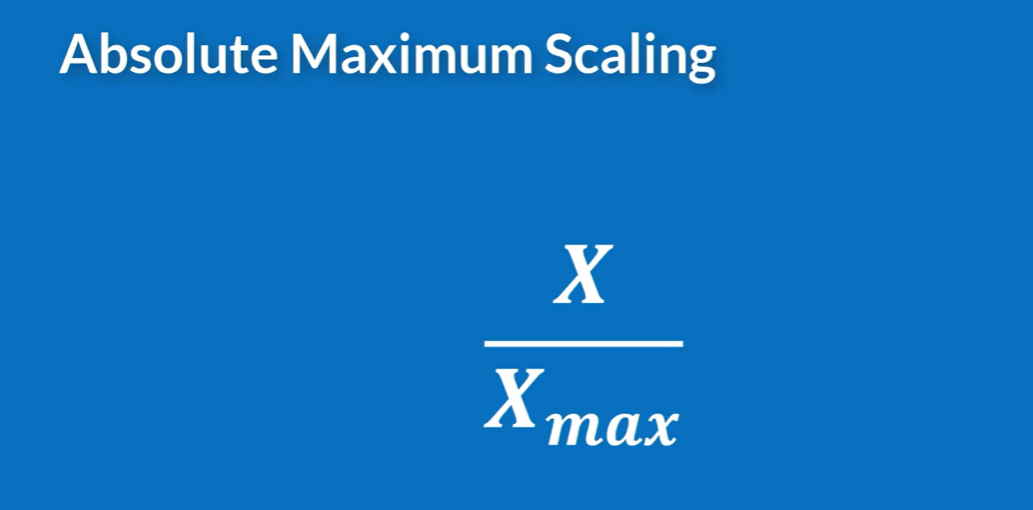

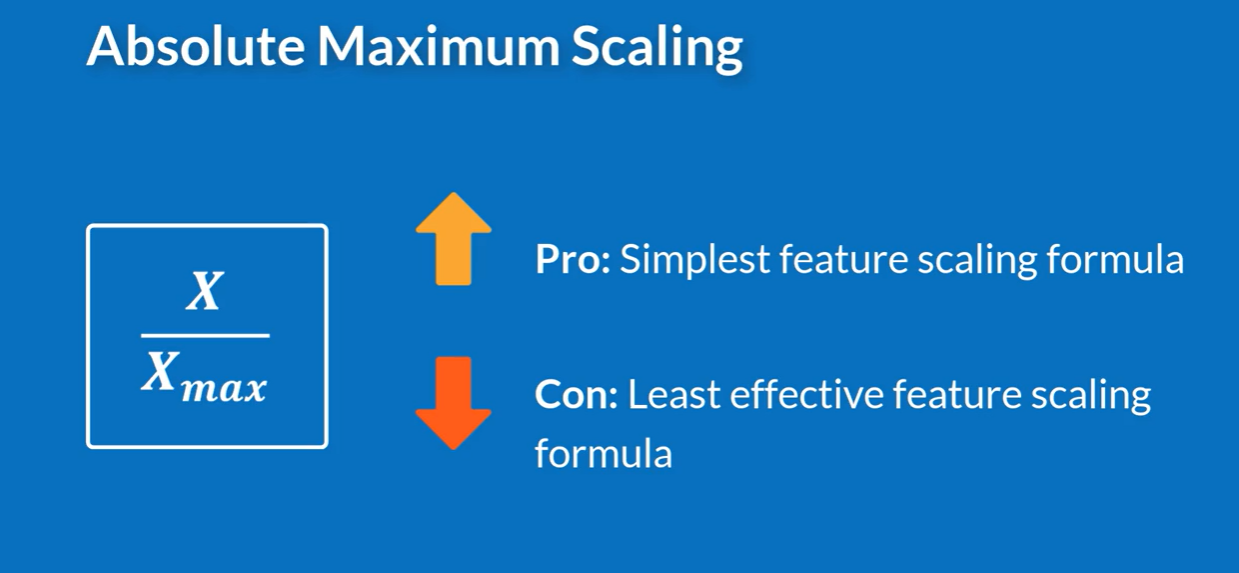

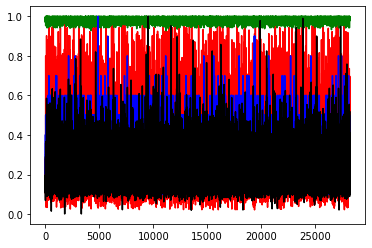

In [6]:
#Absolute Maximum Scaling
from sklearn.preprocessing import MaxAbsScaler

abs_scaler = MaxAbsScaler().fit_transform(housing)
housing_abs = pd.DataFrame(abs_scaler, columns=housing.columns)

plt.plot(x,housing_abs["PRICE"],'red')
plt.plot(x,housing_abs["BUILD_YEAR"],'green')
plt.plot(x,housing_abs["BEDROOMS"],'blue')
plt.plot(x,housing_abs["FLOOR_AREA"],'black');

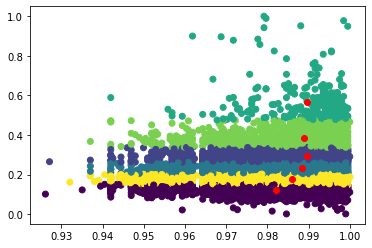

In [7]:
from sklearn.cluster import KMeans

K=6

kmeans = KMeans(n_clusters=K)
cluster = kmeans.fit_predict(housing_abs[["BUILD_YEAR","FLOOR_AREA"]])

import matplotlib.pyplot as plt

plt.scatter(housing_abs["BUILD_YEAR"],housing_abs["FLOOR_AREA"],c=cluster)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red')
plt.show()

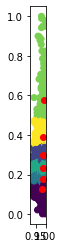

In [8]:
from sklearn.cluster import KMeans

K=6

kmeans = KMeans(n_clusters=K)
cluster = kmeans.fit_predict(housing_abs[["BUILD_YEAR","FLOOR_AREA"]])

import matplotlib.pyplot as plt

plt.scatter(housing_abs["BUILD_YEAR"],housing_abs["FLOOR_AREA"],c=cluster)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red')
plt.axis('scaled');

# Feature Scaling with Min-Max Scaling

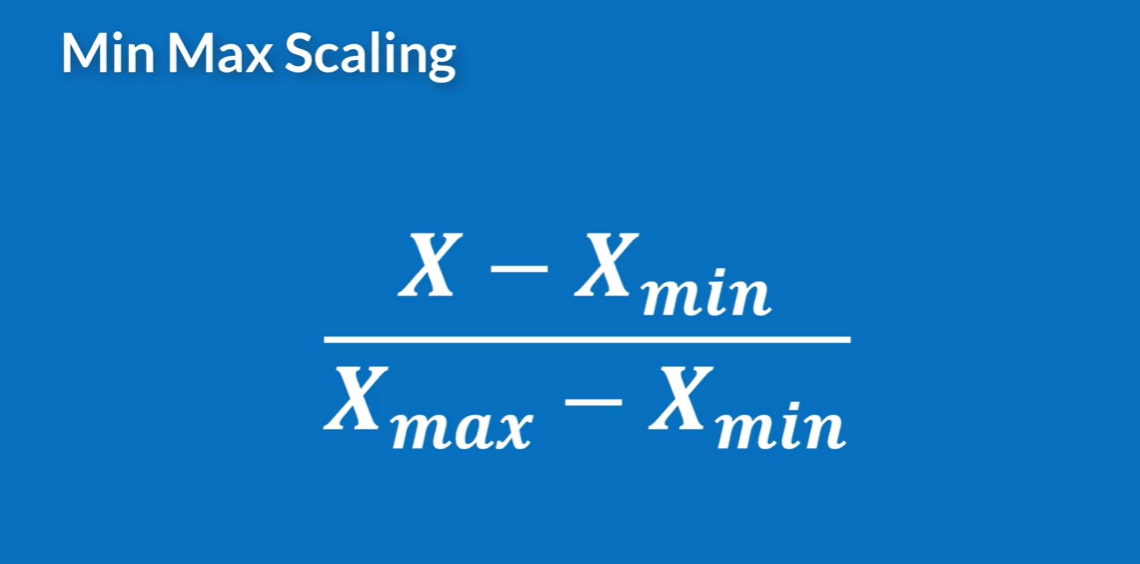

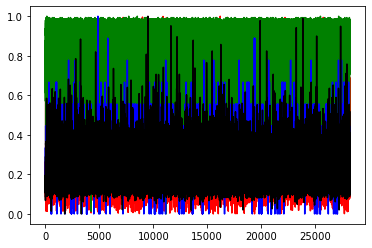

In [9]:
#Min Max Scaling
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit_transform(housing)
housing_min_max = pd.DataFrame(min_max_scaler, columns=housing.columns)

plt.plot(x,housing_min_max["PRICE"],'red')
plt.plot(x,housing_min_max["BUILD_YEAR"],'green')
plt.plot(x,housing_min_max["BEDROOMS"],'blue')
plt.plot(x,housing_min_max["FLOOR_AREA"],'black');

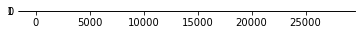

In [10]:
#Min Max Scaling
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit_transform(housing)
housing_min_max = pd.DataFrame(min_max_scaler, columns=housing.columns)

plt.plot(x,housing_min_max["PRICE"],'red')
plt.plot(x,housing_min_max["BUILD_YEAR"],'green')
plt.plot(x,housing_min_max["BEDROOMS"],'blue')
plt.plot(x,housing_min_max["FLOOR_AREA"],'black')
plt.axis('scaled');

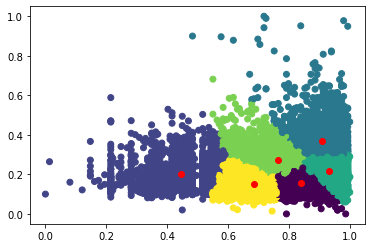

In [11]:
from sklearn.cluster import KMeans

K=6

kmeans = KMeans(n_clusters=K)
cluster = kmeans.fit_predict(housing_min_max[["BUILD_YEAR","FLOOR_AREA"]])

import matplotlib.pyplot as plt

plt.scatter(housing_min_max["BUILD_YEAR"],housing_min_max["FLOOR_AREA"],c=cluster)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red')
plt.show()

# Feature Scaling with Standardization (useful when features are normally distributed)

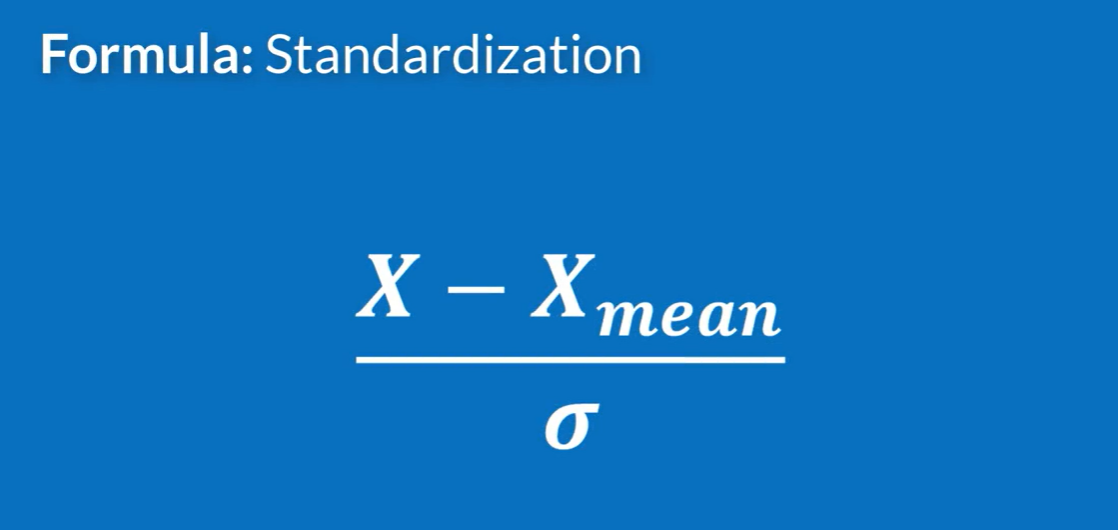

In [12]:
housing.columns

Index(['PRICE', 'BEDROOMS', 'FLOOR_AREA', 'BUILD_YEAR'], dtype='object')

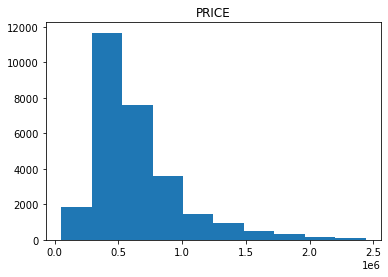

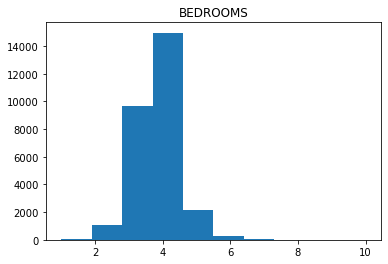

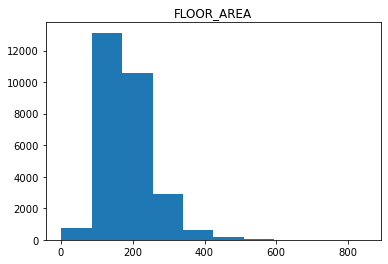

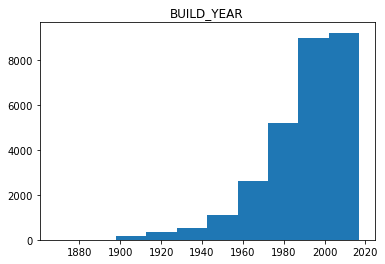

In [13]:
for column in housing.columns:
    plt.hist(housing[column])
    plt.title(column)
    plt.show();
# Price is normally distributed
# Build_year is heavily skewed but, is somewhat normally distributed so we will keep it
# Floor area is also normally distributed
# Bedrooms is also normally distributed

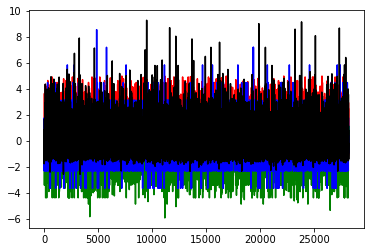

In [14]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler().fit_transform(housing)
housing_std = pd.DataFrame(std_scaler, columns=housing.columns)

plt.plot(x,housing_std["PRICE"],'red')
plt.plot(x,housing_std["BUILD_YEAR"],'green')
plt.plot(x,housing_std["BEDROOMS"],'blue')
plt.plot(x,housing_std["FLOOR_AREA"],'black');

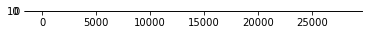

In [15]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler().fit_transform(housing)
housing_std = pd.DataFrame(std_scaler, columns=housing.columns)

plt.plot(x,housing_std["PRICE"],'red')
plt.plot(x,housing_std["BUILD_YEAR"],'green')
plt.plot(x,housing_std["BEDROOMS"],'blue')
plt.plot(x,housing_std["FLOOR_AREA"],'black');
plt.axis('scaled');

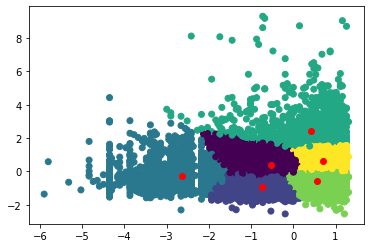

In [16]:
from sklearn.cluster import KMeans

K=6

kmeans = KMeans(n_clusters=K)
cluster = kmeans.fit_predict(housing_std[["BUILD_YEAR","FLOOR_AREA"]])

import matplotlib.pyplot as plt

plt.scatter(housing_std["BUILD_YEAR"],housing_std["FLOOR_AREA"],c=cluster)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red')
plt.show()

# Feature Scaling with Robust Scaling

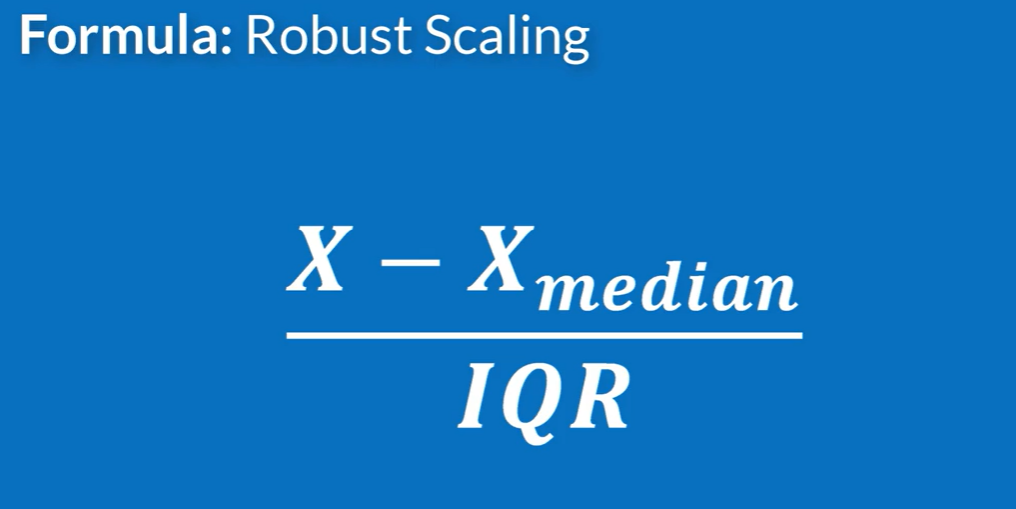

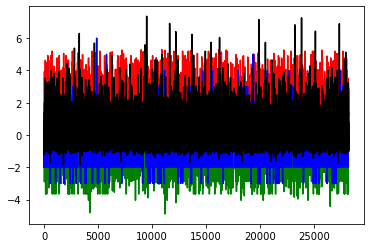

In [17]:
#Robust Scaling
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler().fit_transform(housing)
housing_robust = pd.DataFrame(robust_scaler, columns=housing.columns)

plt.plot(x,housing_robust["PRICE"],'red')
plt.plot(x,housing_robust["BUILD_YEAR"],'green')
plt.plot(x,housing_robust["BEDROOMS"],'blue')
plt.plot(x,housing_robust["FLOOR_AREA"],'black');

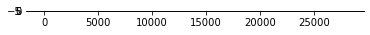

In [18]:
#Robust Scaling
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler().fit_transform(housing)
housing_robust = pd.DataFrame(robust_scaler, columns=housing.columns)

plt.plot(x,housing_robust["PRICE"],'red')
plt.plot(x,housing_robust["BUILD_YEAR"],'green')
plt.plot(x,housing_robust["BEDROOMS"],'blue')
plt.plot(x,housing_robust["FLOOR_AREA"],'black')
plt.axis('scaled');

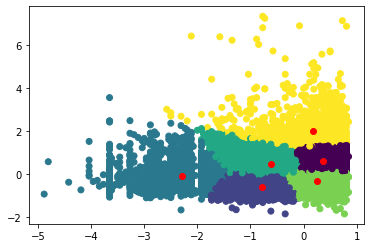

In [19]:
from sklearn.cluster import KMeans

K=6

kmeans = KMeans(n_clusters=K)
cluster = kmeans.fit_predict(housing_robust[["BUILD_YEAR","FLOOR_AREA"]])

import matplotlib.pyplot as plt

plt.scatter(housing_robust["BUILD_YEAR"],housing_robust["FLOOR_AREA"],c=cluster)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red')
plt.show()

#### Conclusion
- Absolute maximum scaling does not work well with data whose values are all very similar to the maximum value.This meant that it didn't address our issue with the K-means algorithm.
- Min Max scaling method is better when there's a feature like build year, where most values are similar to the maximum value.
- Standardization uses the mean and standard deviation in its computations. This technique is recommended when your data is normally distributed, like age or salary.
- Robust scaling uses the median and interquartile range and is robust against outliers that can distort other feature scaling techniques.

# Feature Selection

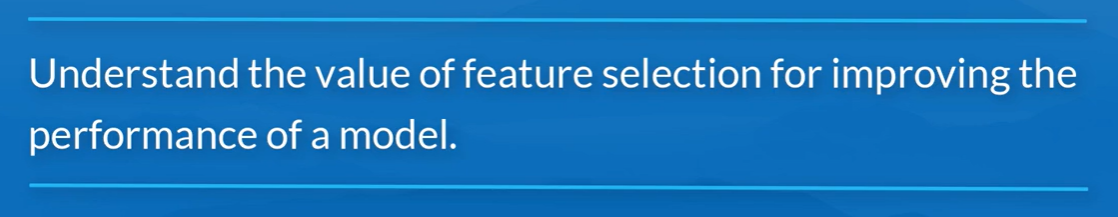

In [20]:
import pandas as pd
from urllib.request import urlretrieve

url = "https://ac-101708228-virtuoso-prod.s3.amazonaws.com/uploads/download/73/mobile_price.csv"

urlretrieve(url, "mobile_price_dataset.csv")

mobile_price_dataset = pd.read_csv("mobile_price_dataset.csv")
print(mobile_price_dataset.shape)
mobile_price_dataset.head()

(2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [21]:
predictors = mobile_price_dataset.iloc[:,0:20]
response = mobile_price_dataset.iloc[:,-1]

In [22]:
from sklearn.model_selection import train_test_split

split = train_test_split(predictors, response, test_size=0.20, random_state=99)

predictors_train = split[0]
predictors_test = split[1]
response_train = split[2]
response_test = split[3]

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

classifier = DecisionTreeClassifier()
classifier.fit(predictors_train, response_train)
response_predictions = classifier.predict(predictors_test)

print(classification_report(response_test, response_predictions))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        94
           1       0.74      0.80      0.77        99
           2       0.81      0.78      0.80       110
           3       0.90      0.87      0.88        97

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



# Chi2 Test of Independence

- The Chi2 test of independence is used to check if two separate features are dependent on each other. In other words, when one value changes will the other change. An example of dependent features is rainfall and umbrella sales. If rainfall increases, more people will buy umbrellas.

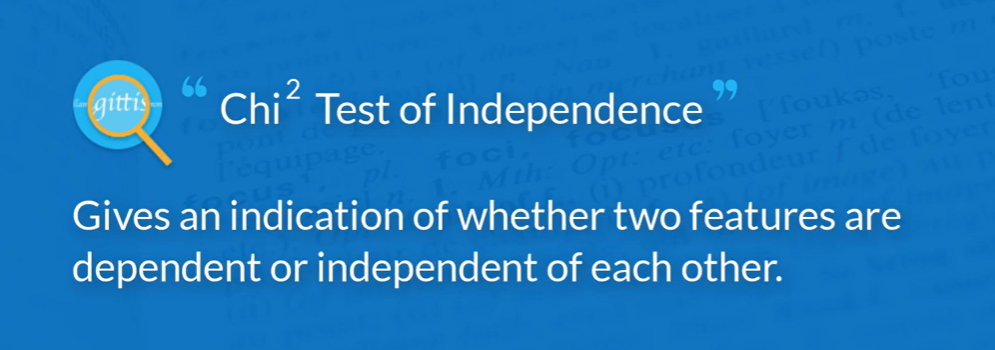

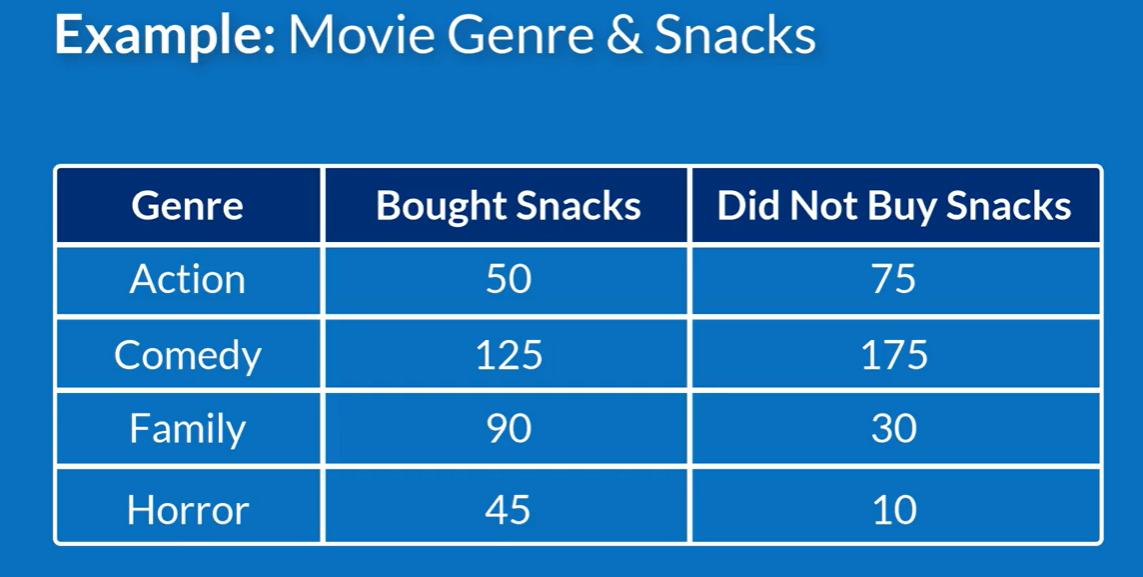

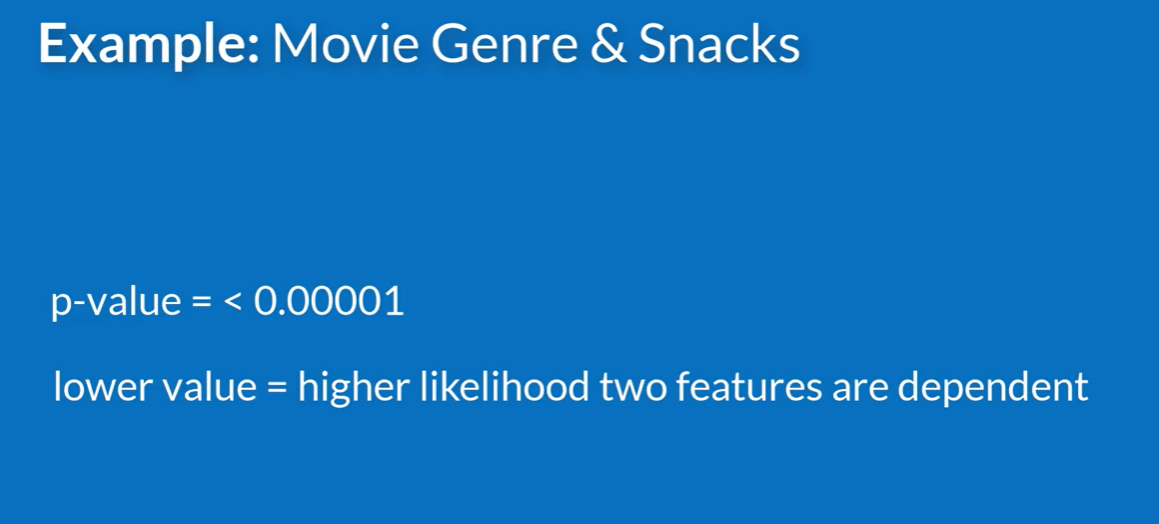

- We’ll use a function that will perform a Chi2 test of independence between each predictor feature and the response feature. This will allow us to see which features have the strongest dependent relationship with the response. We’ll also see which features have a weak relationship. This is critical because we’ll be able to remove these features from the model. That will increase the efficiency of the model and may even boost the accuracy as we’ll be removing “dead weight”.

# Applying Feature Selection

In [24]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(predictors,response)

import numpy as np
arr=np.array([predictors.columns,fit.scores_]).transpose()
predictor_scores=pd.DataFrame(arr,columns=["Predictors","Score"])
predictor_scores.sort_values(by="Score",ascending=False)

,Predictors,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.58675
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.2364
4,fc,10.135166
14,sc_h,9.614878


In [25]:
type(predictors)

pandas.core.frame.DataFrame

In [26]:
type(response)

pandas.core.series.Series

In [27]:
predictors = mobile_price_dataset[["ram","px_height","battery_power","px_width"]]
split = train_test_split(predictors, response, test_size=0.20, random_state=99)
predictors_train = split[0]
predictors_test = split[1]
response_train = split[2]
response_test = split[3]

classifier = DecisionTreeClassifier()
classifier.fit(predictors_train, response_train)
response_predictions = classifier.predict(predictors_test)

print(classification_report(response_test, response_predictions))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90        94
           1       0.82      0.85      0.84        99
           2       0.85      0.80      0.82       110
           3       0.87      0.89      0.88        97

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



#### Conclusion
- First, we used feature selection functions on our predictors to see which ones have the strongest relationship with the response feature. We noted that ram, px_height, battery_power, and px_width have the strongest relationships by far.
- Second, we excluded weak predictors from the model. We saw some marginal gains in all metrics, which justified our use of feature selection.

# Dimensionality Reduction

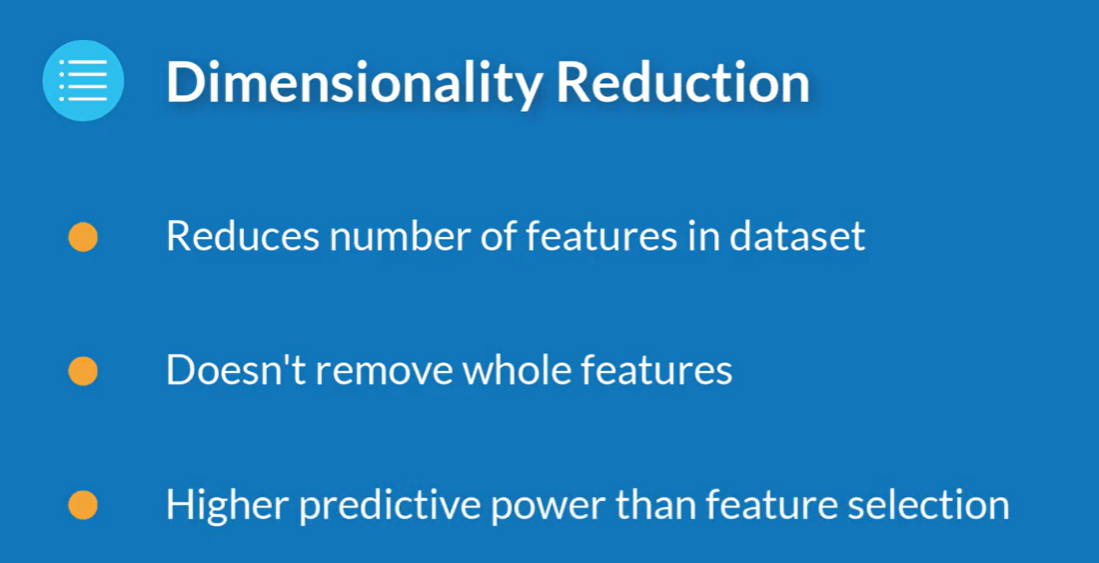

# Principal Component Analysis

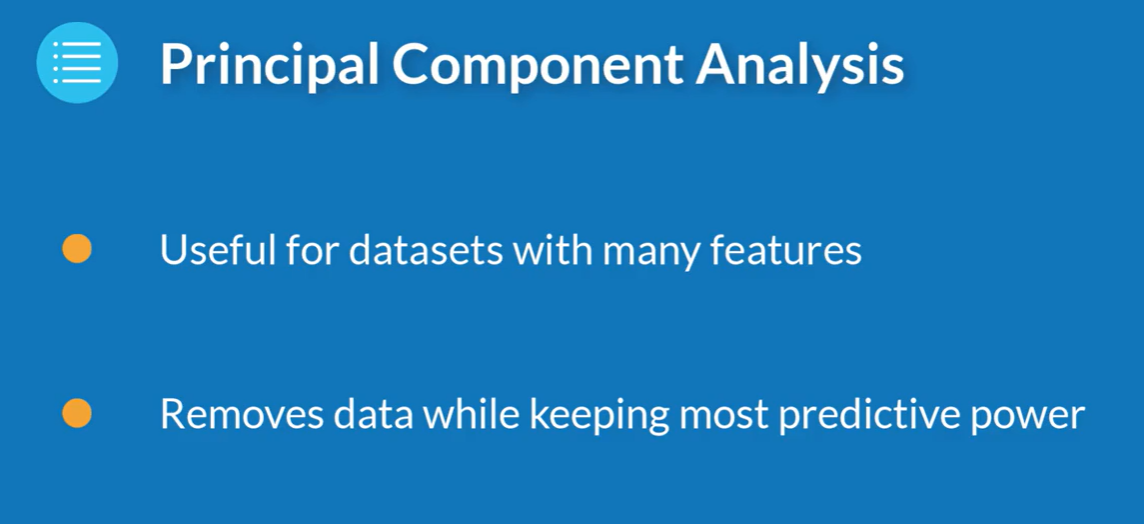

# Individual Component Analysis

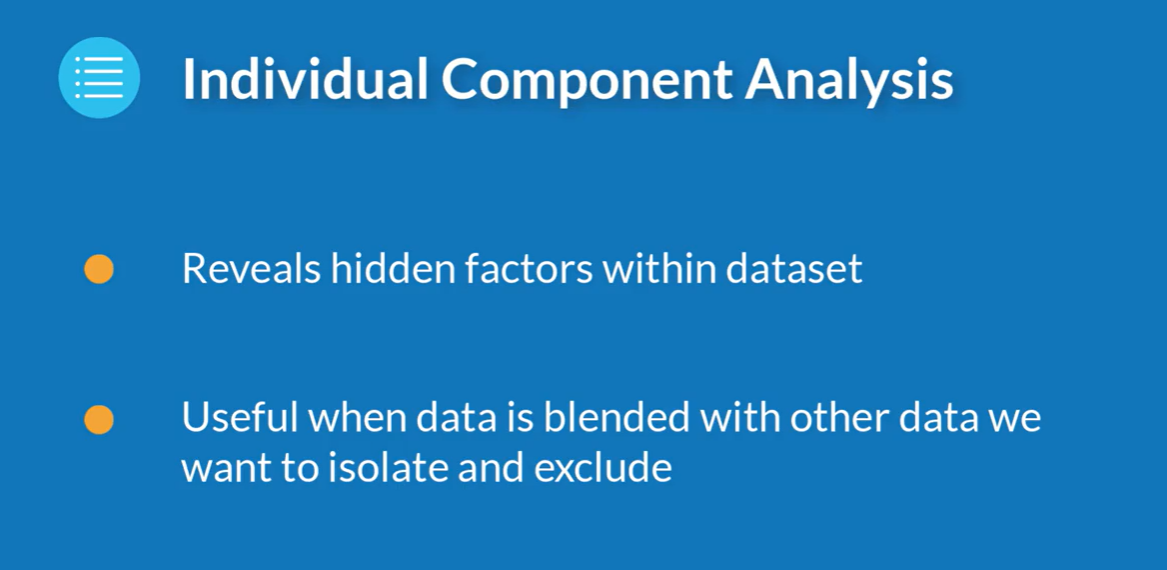

#### Conclusion
- First, we learned about principal component analysis. We learned how this algorithm replaces our features with components, and that we can remove the vast majority of these components without losing much predictive power.
- Second we learned about individual component analysis. We learned that it can be used to separate two signals in the same data.

# Principal Component Analysis Working

In [28]:
import pandas as pd
from urllib.request import urlretrieve

url = "https://ac-101708228-virtuoso-prod.s3.amazonaws.com/uploads/download/72/handwritten_numbers_dataset.csv"

urlretrieve(url, "handwritten_numbers_dataset.csv")

handwritten_numbers_dataset = pd.read_csv("handwritten_numbers_dataset.csv")
handwritten_numbers_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
response = handwritten_numbers_dataset.loc[:,'0']
predictors = handwritten_numbers_dataset.drop(['0'], axis=1)

In [30]:
from sklearn.model_selection import train_test_split

split = train_test_split(predictors, response, test_size=0.20, random_state=99)

predictors_train = split[0]
predictors_test = split[1]
response_train = split[2]
response_test = split[3]

# Without PCA

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

classifier = DecisionTreeClassifier()
classifier.fit(predictors_train, response_train)
response_predictions = classifier.predict(predictors_test)

print(classification_report(response_test, response_predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       190
           1       0.99      0.98      0.99       237
           2       0.94      0.95      0.95       203

    accuracy                           0.97       630
   macro avg       0.96      0.96      0.96       630
weighted avg       0.97      0.97      0.97       630



# With PCA ( start with n_components = 1)

In [32]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
predictors_train_std = std_scaler.fit_transform(predictors_train)
predictors_test_std = std_scaler.fit_transform(predictors_test)

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
predictors_train_pca = pca.fit_transform(predictors_train_std)
predictors_test_pca = pca.transform(predictors_test_std)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

classifier = DecisionTreeClassifier()
classifier.fit(predictors_train_pca, response_train)
response_predictions = classifier.predict(predictors_test_pca)

print(classification_report(response_test, response_predictions))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       190
           1       0.93      0.89      0.91       237
           2       0.74      0.77      0.75       203

    accuracy                           0.84       630
   macro avg       0.84      0.84      0.84       630
weighted avg       0.84      0.84      0.84       630



# With PCA (with n_components = 2)

In [34]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
predictors_train_std = std_scaler.fit_transform(predictors_train)
predictors_test_std = std_scaler.fit_transform(predictors_test)

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
predictors_train_pca = pca.fit_transform(predictors_train_std)
predictors_test_pca = pca.transform(predictors_test_std)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

classifier = DecisionTreeClassifier()
classifier.fit(predictors_train_pca, response_train)
response_predictions = classifier.predict(predictors_test_pca)

print(classification_report(response_test, response_predictions))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       190
           1       0.97      0.94      0.96       237
           2       0.85      0.89      0.87       203

    accuracy                           0.91       630
   macro avg       0.91      0.91      0.91       630
weighted avg       0.91      0.91      0.91       630



# With PCA (with n_components = 3)

In [36]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
predictors_train_std = std_scaler.fit_transform(predictors_train)
predictors_test_std = std_scaler.fit_transform(predictors_test)

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
predictors_train_pca = pca.fit_transform(predictors_train_std)
predictors_test_pca = pca.transform(predictors_test_std)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

classifier = DecisionTreeClassifier()
classifier.fit(predictors_train_pca, response_train)
response_predictions = classifier.predict(predictors_test_pca)

print(classification_report(response_test, response_predictions))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       190
           1       0.99      0.96      0.97       237
           2       0.87      0.92      0.89       203

    accuracy                           0.93       630
   macro avg       0.93      0.93      0.93       630
weighted avg       0.93      0.93      0.93       630



# With PCA (with n_components = 4)

In [38]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
predictors_train_std = std_scaler.fit_transform(predictors_train)
predictors_test_std = std_scaler.fit_transform(predictors_test)

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
predictors_train_pca = pca.fit_transform(predictors_train_std)
predictors_test_pca = pca.transform(predictors_test_std)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

classifier = DecisionTreeClassifier()
classifier.fit(predictors_train_pca, response_train)
response_predictions = classifier.predict(predictors_test_pca)

print(classification_report(response_test, response_predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       190
           1       1.00      0.97      0.98       237
           2       0.93      0.96      0.94       203

    accuracy                           0.96       630
   macro avg       0.96      0.96      0.96       630
weighted avg       0.96      0.96      0.96       630



#### Conclusion
- We learned about PCA and ICA, and we used PCA to dramatically reduce the number of predictor features in our data set without any significant impact on the model's performance.